## Import Library dan Load Data 

In [1]:
import pandas as pd

In [2]:
data_train = pd.read_csv('dataset/train.csv')
data_test = pd.read_csv('dataset/test.csv')

In [3]:
#untuk melihat banyak data pada data train

data_train.shape

(31962, 3)

In [6]:
#untuk melihat banyak data pada data test

data_test.shape

(17197, 2)

In [7]:
#mengambil 5 data teratas pada data train

data_train.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
#mengambi 5 data terbawah pada data train

data_train.tail(5)

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [9]:
#mengamnil 5 data secara acak pada data train

data_train.sample(5)

,id,label,tweet
29364,29365,0,smiles are contagious. smile at someone and se...
24562,24563,0,12 days to go #bbfotm @user @user fingers cr...
4363,4364,0,welcome to the kearny mesa hyundai family! con...
1253,1254,0,i work another double tomorrow #yes #woohoo
24317,24318,0,bigballs96 - na: #porn #naughty #slut #snaps...


In [10]:
#deskripsi data pada data train

data_train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [11]:
#melihat kolom pada data train

data_train.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [12]:
#menghitung jumlah variabel pada kolom tweets
data_train['tweet'].value_counts()

#model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦                                  319
i finally found a way how to delete old tweets! you might find it useful as well:    #deletetweets                     82
aww yeah it's all good bing bong bing bong                                                                             75
i'm so   and #grateful now that - #affirmations                                                                        56
@user you might be a libtard if... #libtard  #sjw #liberal #politics                                                   40
                                                                                                                     ... 
 â #outllook for aud/nzd towards 1.1000 - westpac   #blog #silver #gold #forex                                        1
 @user thanks for 3k guys!!!!!!   #thankful @user im following anyone who 's this!                                      1
@user @user @user you me

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

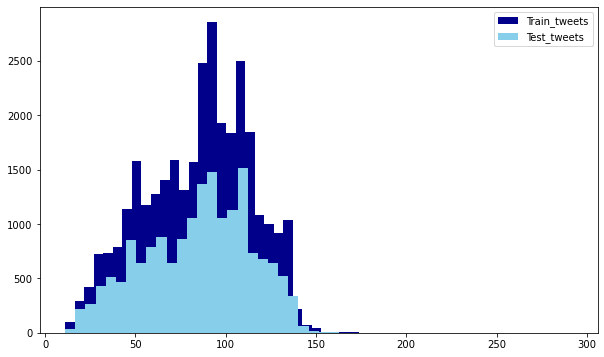

In [14]:
#melihat panjang tweet dalam data train dan data test

length_train = data_train['tweet'].str.len()
length_test = data_test['tweet'].str.len()
plt.figure(figsize=(10,6))
plt.hist(length_train, bins=50, label="Train_tweets", color = "darkblue")
plt.hist(length_test, bins=50, label='Test_tweets', color = "skyblue")
plt.legend()

### Membuat train_test

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X=data_train.label
y=data_train.tweet

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=225)

In [18]:
#melihat pembagian data di x_train, x_test, y_train dan y_test

print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))



Banyak data x_train : 28765
Banyak data x_test  : 3197
Banyak data y_train : 28765
Banyak data y_test  : 3197


## Preprocessing

Pada tahap ini yang dilakukan adalah membuat data yang ada menjadi data yang lebih berkualitas atau lebih baik, dikarenakan pada data mentah masih ada yang mengandung agregat data, noisy data yang masih mengandung error dan outliers, serta ada nya data yang tidak konsisten.

In [19]:
import re

In [39]:
pip install -U beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [20]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
import numpy as np

In [21]:
def proses_teks(teks):
    soup = BeautifulSoup(teks, 'lxml')
    souped = soup.get_text()
    try:
        teks = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        teks = souped
    teks_bersih= re.sub("[^a-zA-Z0-9]", " ",(re.sub(www_pat, '', re.sub(combined_pat, '', teks)).lower()))
    teks_bersih= ' '.join([word for word in teks_bersih.split() if word not in stopword_user])
    return (" ".join([x for x in tok.tokenize(teks_bersih) if len(x) > 1])).strip()

In [22]:
merge = data_train.append(data_test, ignore_index=True, sort=False)
merge.shape

(49159, 3)

In [23]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+' #menghilangkat username
pat2 = r'https?://[^ ]+' #menghilangkan situs website
combined_pat = r'|'.join((pat1, pat2)) #join pat1 dan pat 2
www_pat = r'www.[^ ]+' #menghilangkan situs website

In [24]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

merge['clean_tweet'] = np.vectorize(remove_pattern)(merge['tweet'], "@[\w]*") #menghilangkan @user
merge['clean_tweet'] = merge['clean_tweet'].str.replace("[^a-zA-Z#]", " ") #menghilangkan punctuation, angka, dan karakter
merge['clean_tweet'] = merge['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #menghapus kata pendek

In [54]:
merge.head(5)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


### Tokenization

Tahap ini merupakan proses memecah dokumen yang terdiri dari sekumpulan kalimat menjadi bagian-bagian kata yang disebut dengan token

In [25]:
tokenized_tweet = merge['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

### Stemming

Tahap ini merupakan mantransformasi kata menjadi kata dasar dengan menghilangkan imbuhan kata

In [26]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

### Transformation

In [27]:
#menambahkan tweet yang sudah bersih ke dalam data frame

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
merge['clean_tweet'] = tokenized_tweet
merge.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


### Visualiasasi dengan data yang sudah bersih, dengan menggunakan Word Cloud

In [28]:
#untuk melihat sentimen yang ada pada seluruh data train. Dapat dilihat dengan memahami kata yang umum dengan plot word cloud

from wordcloud import WordCloud
def plot_wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')

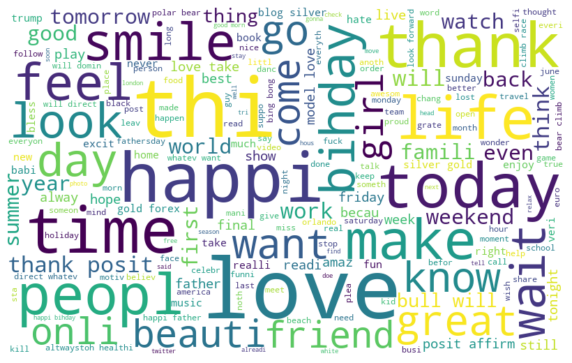

In [29]:
# untuk melihat semua kata yang mengalami sentimen analisis

all_words = ' '.join([text for text in merge['clean_tweet']])
plot_wordCloud(all_words)

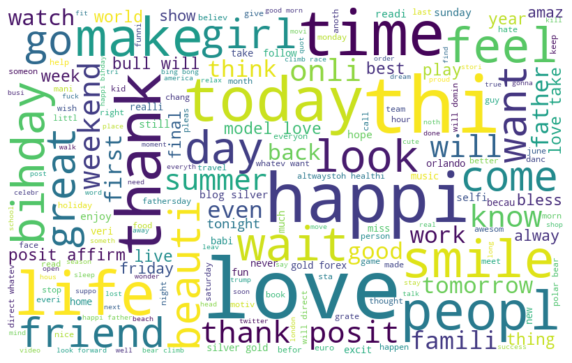

In [35]:
#untuk melihat kata kata yang normal atau netral
normal_words = ' '.join(text for text in merge['clean_tweet'][merge['label'] == 0]) 
plot_wordCloud(normal_words)

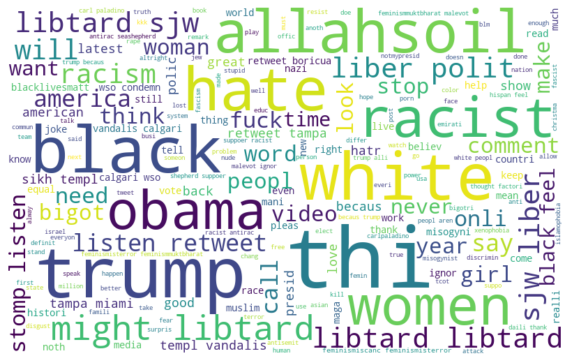

In [34]:
#untuk melihat kata-kata yang negatif
negative_words = ' '.join(text for text in merge['clean_tweet'][merge['label'] == 1]) 
plot_wordCloud(negative_words)

## Extracting Features

### Bag-of-words

Bag of word merupakan representasi penyederhanaan yang digunakan dalam NLP. Dalam model ini, direpresentasi sebagai bag (multiset) kata-katanya, mengabaikan tata bahasa dan urutan kata tetapi tetap berkembang

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(merge['clean_tweet'])

### TF_IDF

TF-IDF atau Term Frequency-Inverse Document Frequency, merupakan proses pemberian bobot term pada dokumen. Pembobotan ini dogunakan untuk melakukan klasifikasi data.

In [36]:
tfidf_vectorizer = CountVectorizer(max_df=0.90, max_features=1000, stop_words='english')
tfidf = bow_vectorizer.fit_transform(merge['clean_tweet'])

### Word2vec

Word2vec adalah metode embedding word yang berguna untuk mempresentasikan kata menjadi sebuah vektor dengan panjang N. 

In [37]:
tokenized_tweet = merge['clean_tweet'].apply(lambda x: x.split()) #tokenize

import gensim
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200,
            window = 5, #ukuran jendela
            min_count =2,
            sg = 1, #skip gram model
            hs = 0,
            negative = 10, #jumlah contoh kata negatif
            workers = 2,
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(merge['clean_tweet']), epochs=20)

(6510363, 7536020)

In [38]:
model_w2v.wv.most_similar(positive="obama")

[('michel', 0.6128982305526733),
 ('#paladino', 0.5826528072357178),
 ('#garbag', 0.5565042495727539),
 ('barrack', 0.5559651851654053),
 ('vaniti', 0.5520521402359009),
 ('jibe', 0.5492500066757202),
 ('#fyi', 0.5491704940795898),
 ('bovin', 0.5466610193252563),
 ('cower', 0.5462453365325928),
 ('cabbag', 0.5444692373275757)]

Pembuatan vektor untuk setiap tweet dengan mengambil rata-rata vektor dari kata kata yang ada di tweet

In [41]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # apabila ada kasus dimana token tidak ada dalam kosa kata
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [40]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

<ipython-input-39-2f6882f45f7b>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec += model_w2v[word].reshape((1, size))


(49159, 200)